# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Цель исследования
1. Определить, как различные факторы влияют на стоимость квартиры
2. Выяснить, в какие месяцы и за какой срок чаще продаются квартиры
3. Установить населенные пункты с самой высокой и низкой стоимостью жилья в Санкт-Петербурге и соседних населённых пунктах.
#### Ход исследования
- Получить данные из датафрейма real_estate_data.csv, изучить их.
- При необходимости обработать данные, заполнить пропуски, если такие имеются и это возможно, изменить типы данных, устранить дубликаты, по возможности найти причины и избавиться от аномальных значений.
- Добавить новые столбцы в таблицу, необходимые для дальнейшего исследования.
- Провести анализ объявлений о продаже недвижимости.
- Выяснить как различные факторы влияют на стоимость квартиры.
- Изучить как быстро продаются квартиры.
- Выяснить какие факторы в большей степени влияют на стоимость квартиры.
- Выделить топ-10 населённых пунктов, информации о продаже недвижимости в которых больше всего и определить среди них самую высокую и низкую стоимость квадратного метра.
- Определить, как удалённость от центра города влияет на стоимость квадратного метра.
- Подвести общие итоги исследования.

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore') 
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('C://work/real_estate_data.csv', sep = '\t')
#изучим первые строки
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,"3,700,000.00",37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,...,14.40,1.00,посёлок Парголово,"52,996.00","19,143.00",0.00,NaN,0.00,NaN,155.00
7,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,...,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,NaN,0.00,NaN,NaN
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,"5,400,000.00",61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,...,6.50,2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,NaN,0.00,NaN,289.00


In [3]:
#Получим детальную информацию о колонках DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Всего 23699 записи. У 
- last_price (float -> int), 
- first_day_exposition (object -> date), 
- floors_total (float -> int),  
- is_apartment (object -> bool), 
- balcony (float -> int), 
- parks_around3000 (float -> int), 
- ponds_around3000 (float -> int), 
- days_exposition (float -> int) 
некорректный тип данных. 

In [4]:
#Получим статистическую характеристику данных 
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00","23,613.00","21,796.00","23,699.00","21,421.00","12,180.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


Во многих стобцах присутствуют аномальные значения.

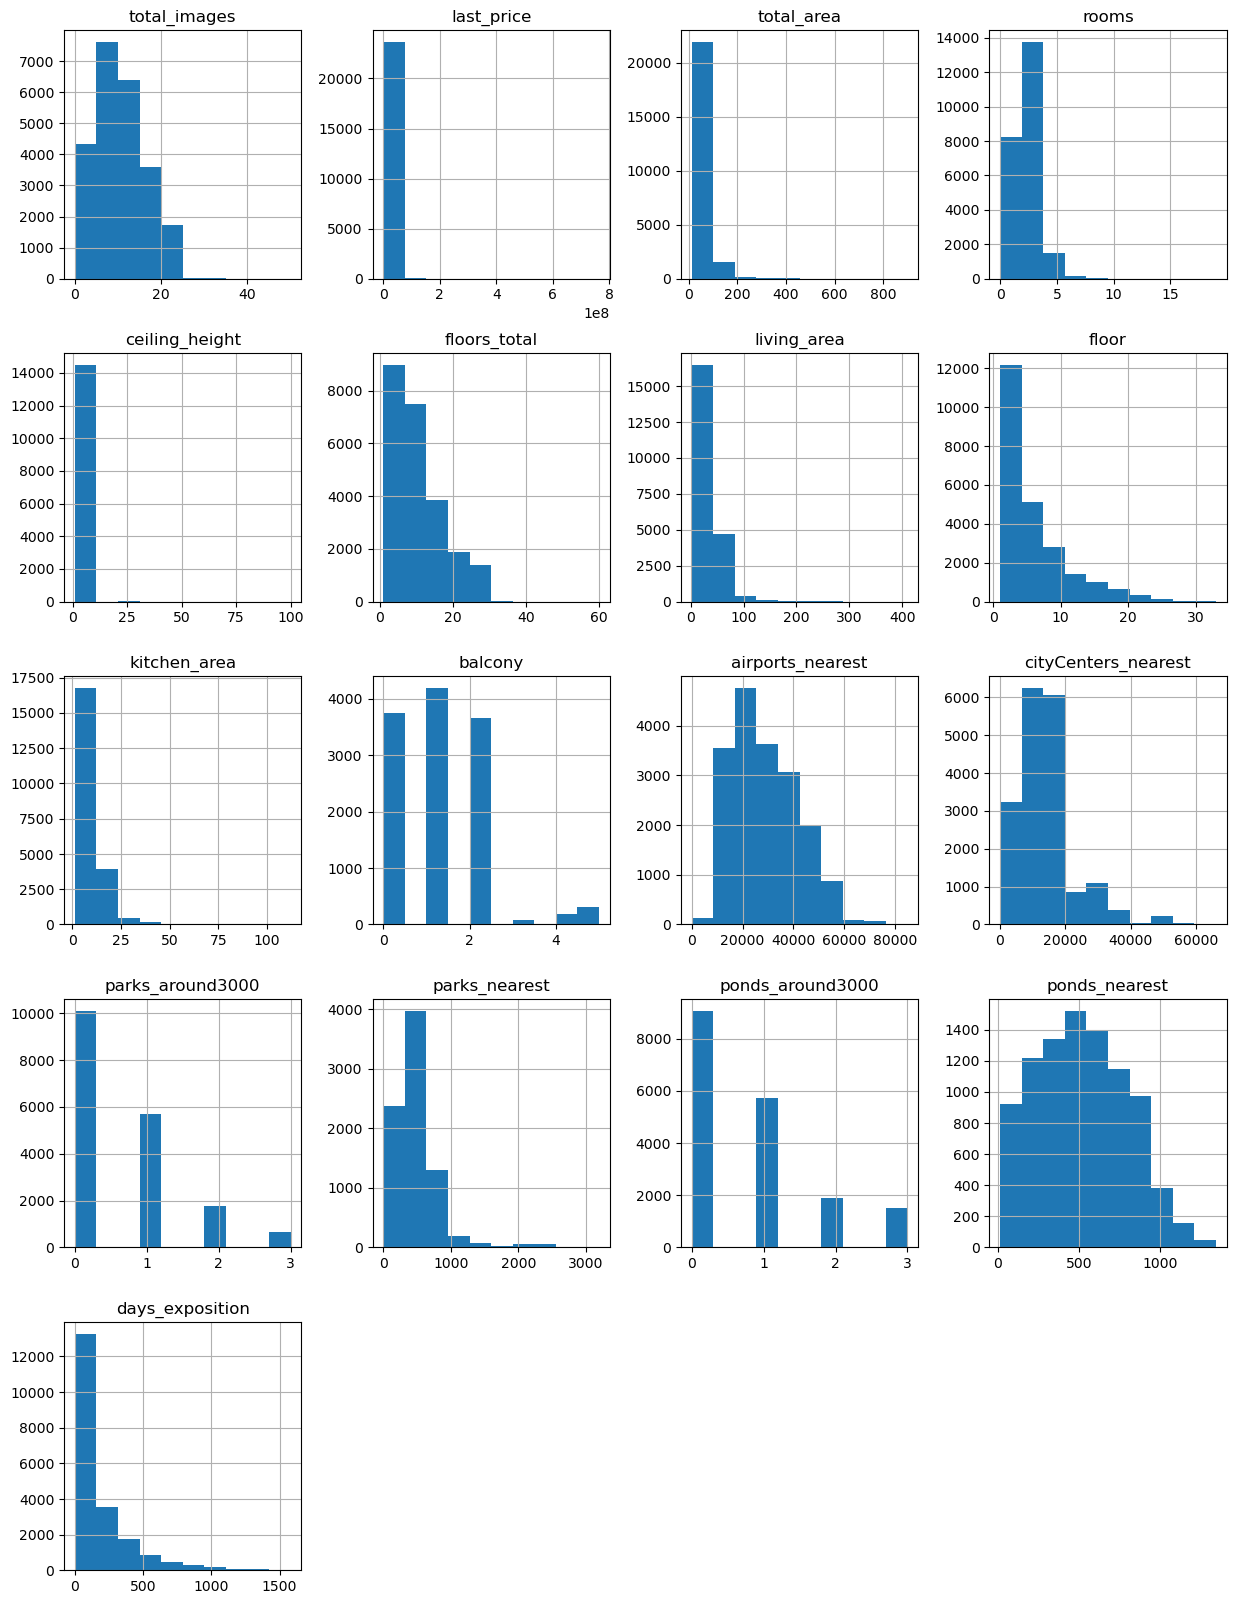

In [5]:
#общая гистограмма для всех числовых столбцов таблицы
data.hist(figsize=(15, 20))
plt.show();

### Предобработка данных

In [6]:
#Определяем, в каких столбцах есть пропуски.
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
#Определяем пропуски в столбцах в %
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


- Пропуски в столбце ceiling_height отложим на попозже, так как там имелись аномальные значения, то мы не можем заменить их на медианное значение.
- Пропуски в столбце is_apartment могут говорить о том, что это НЕ апартаменты.
- Пропуски в столбце balcony могут говорить о том, что балкона в квартире нет, так что можем заменить значения на 0.
- Пропуски в столбцах parks_around3000 и ponds_around3000 могут говорить о том, что парков и прудов рядом с домом нет, так что также заменим на 0.
- Пропускам в столбце living_area можем присвоить значение total_area - kitchen_area, а пропускам в kitchen_area наоборот total_area - living_area
- Записи с пропусками в столбцах floors_total и locality_name я думаю мы можем удалить, так как их немного, а заменить категориальные переменные не представляется возможным.

In [8]:
#удаляем записи с пропусками в столбцах floors_total и locality_name
data = data.dropna(subset=['locality_name'])
data = data.dropna(subset=['floors_total'])
#floors_total меняем тип на int
data['floors_total'] = data['floors_total'].astype(int)

In [9]:
#присваиваем пропускам в столбце balcony 0 и меняем тип на int
data['balcony'] = data['balcony'].fillna(0).astype(int)
#присваиваем пропускам в столбце is_Apartment False
data['is_apartment'] = data['is_apartment'].fillna(False)

In [10]:
#присваиваем пропускам в столбце parks_around3000 0 и меняем тип на int
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype(int)
#присваиваем пропускам в столбце ponds_around3000 0 и меняем тип на int
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype(int)

In [11]:
#присваиваем пропускам в столбце living_area, kitchen_area разницу между общей площадью и кухней/жилой соответственно
data['living_area'] = data['living_area'].fillna(data['total_area'] - data['kitchen_area'])
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] - data['living_area'])

проверим ещё раз

In [12]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1427
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             1427
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

Остались пустые значения в kitchen_area и living_area, так как они равны, то скорее всего это одни и те же строки, то есть предыдущий способ не подошел, так что можем присвоить им медианные значения.

In [13]:
#оставшиеся пропустки в kitchen_area и living_area заменяем медианными значениями
living_ratio = data['living_area'].mean() / data['total_area'].mean()
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['living_area'] = data['living_area'].fillna(living_ratio * data['total_area'])
data['kitchen_area'] = data['kitchen_area'].fillna(kitchen_ratio * data['total_area'])

In [14]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [15]:
#начнём разбираться с ceiling_height, посмотрим уникальные значения, чтоб сразу избавиться от больших аномалий, чтоб в дальнейшем заменить медианой
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [16]:
#есть значения, которые явно умножены на 10, например 27.5, 32, разделим такие значения на 10
data.loc[(data['ceiling_height']>24) & (data['ceiling_height']<101), 'ceiling_height'] = data['ceiling_height'] / 10

In [17]:
data['ceiling_height'].unique()

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,
        2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,
        5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,
        4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,
        2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,
        3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,
        2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46, 24.  ,  3.47,  3.33,
        3.63,  3.32,

In [18]:
#еще остались аномалии, но разберёмся с ними чуть позже
#пустые значения для которых есть данные о квартирах с этого же населённого пункта, заменим  медианой по ним
#для которых нет, просто медианой по всем значениям
for locality_name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == locality_name, 'ceiling_height'].median()
    data.loc[(data['ceiling_height'].isna()) & (data['locality_name'] == locality_name), 'ceiling_height'] = median

ceiling_height = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height)    

In [19]:
#зададим тип date first_day_exposition
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
#посчитаем days_exposition для незакрытых объявлений, т.е. вычтем из текущей даты дату публикации и меняем тип на int
#data.loc[data['days_exposition'].isna(), 'days_exposition'] = (pd.Timestamp.now() - data['first_day_exposition']).dt.days
#data['days_exposition'] = data['days_exposition'].astype(int)
#заменим значения days_exposition объявлений, которые не проданы на -1, тем самым пометив их
data['days_exposition'] = data['days_exposition'].fillna(-1)

In [20]:
#поменяем тип данных у last_price (float -> int)
data['last_price'] = data['last_price'].astype(int) 

Проверим избавились ли мы от всех возможных пропусков

In [21]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition             0
dtype: int64

- [x] Пропуски в столбце ceiling_height отложим на попозже, так как там имелись аномальные значения, то мы не можем заменить их на медианное значение.
- [x] Пропуски в столбце is_apartment могут говорить о том, что это НЕ апартаменты.
- [x] Пропуски в столбце balcony могут говорить о том, что балкона в квартире нет, так что можем заменить значения на 0.
- [x] Пропуски в столбцах parks_around3000 и ponds_around3000 могут говорить о том, что парков и прудов рядом с домом нет, так что также заменим на 0.
- [x] Пропускам в столбце living_area можем присвоить значение total_area - kitchen_area, а пропускам в kitchen_area наоборот total_area - living_area
- [x] Записи с пропусками в столбцах floors_total и locality_name я думаю мы можем удалить, так как их немного, а заменить категориальные переменные не представляется возможным.

Проверим сменили ли мы типы данных

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int32         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int32         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

- [x] first_day_exposition (object -> date), 
- [x] floors_total (float -> int),  
- [x] is_apartment (object -> bool), 
- [x] balcony (float -> int), 
- [x] parks_around3000 (float -> int), 
- [x] ponds_around3000 (float -> int), 
- [x] days_exposition (float -> int) 


Остальные пропуски пока оставим. 
Так как заменить расстояния мы не можем.

##### Причины пропусков
- ceiling_height (высота потолков): возможно продавцы квартир типовых застроек даже не задумывались над тем, чтоб заполнить этот пункт, так как решили, что потолок стандартный, или сами даже не знают какой высоты потолок
- is_apartment: скорее всего, пользователи не посчитали нужным отмечать этот пункт, если их квартира не является апартаментами.
- balcony: здесь так же, нет балкона, незачем заполнять, решили продавцы.
- parks_around3000 и ponds_around3000: думаю, парков и прудов вблизи этих домов нет, потому указывать это не стали, так как это не является положительным моментом из-за которого может повыситься спрос, лучше ничего не указывать.
- living_area, kitchen_area: скорее всего, эти поля не являются обязательными для заполнения, потому пользователи не всегда их указывают.
- airports_nearest, cityCenters_nearest: возможно, это не является главным плюсом квартиры или значимым, поэтому пользователь пожелал не указывать данное расстояние
- parks_nearest, ponds_nearest: опять таки повторюсь, возможно, поблизости просто нет парков, нет смысла указывать расстояние до ближайшего парка, который будет находиться, например, в 10 км, так как это не будет плюсом при пролдаже квартиры.
- days_exposition: я думаю, такие объявления еще не сняты с публикаций, от того и пропуски
- locality_name, floors_total: являются важными параметрами при поиске квартиры, так как таких значений немного, возможно, это просто невнимательность пользователей.

___________________________________________________________

In [23]:
data.duplicated().sum()

0

Явных дубликатов в данных нет.

______________________

Изучим уникальные значения в стобце с названиями и устраним неявные дубликаты.

In [24]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [25]:
#посмотрим количество значений
len(data['locality_name'].unique())

364

In [26]:
#приведём всё к нижнему регистру и заменим ё на е
data['locality_name'] = data['locality_name'].str.lower().str.replace('ё','е')

In [27]:
#посмотрим количество значений теперь
len(data['locality_name'].unique())

330

In [28]:
#убедимся, что ё превратилась в е
data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет

In [29]:
#напишем функцию для категоризации населенных пунктов
def categorize_city(name):
    if 'санк' in name:
        return 'столица'
    elif any(x in name for x in ['городск', 'коттедж']):
        return 'ПГТ'
    elif 'дерев' in name:
        return 'деревня'
    elif 'садо' in name:
        return 'садовое товаризество'
    else:
        return 'город'

In [30]:
#создадим столбец с типом населённого пункта
data.insert(loc=15, column='city_category', value=data['locality_name'].apply(categorize_city))

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int32         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int32         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

In [32]:
#напишем функцию для очистки наименований от поселка, деревни и т.д.
def cleaning_name(name):
    clean_names = name.str.replace("|".join(["поселок","деревня","село","городского","типа","садовое","товарищество"]), "", regex=True).str.strip()
    return clean_names

In [33]:
#создадим столбец с очищенными именами
data.insert(loc=15, column='clean_name', value=cleaning_name(data['locality_name']))

In [34]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,clean_name,city_category,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,санкт-петербург,санкт-петербург,столица,"18,863.00","16,028.00",1,482.00,2,755.00,-1.00
1,7,3350000,40.40,2018-12-04,1,2.62,11,18.60,1,False,...,поселок шушары,шушары,город,"12,817.00","18,603.00",0,NaN,0,NaN,81.00
2,10,5196000,56.00,2015-08-20,2,2.70,5,34.30,4,False,...,санкт-петербург,санкт-петербург,столица,"21,741.00","13,933.00",1,90.00,2,574.00,558.00
3,0,64900000,159.00,2015-07-24,3,2.70,14,92.00,9,False,...,санкт-петербург,санкт-петербург,столица,"28,098.00","6,800.00",2,84.00,3,234.00,424.00
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,санкт-петербург,санкт-петербург,столица,"31,856.00","8,098.00",2,112.00,1,48.00,121.00
5,10,2890000,30.40,2018-09-10,1,2.60,12,14.40,5,False,...,городской поселок янино-1,городской янино-1,ПГТ,NaN,NaN,0,NaN,0,NaN,55.00
6,6,3700000,37.30,2017-11-02,1,2.64,26,10.60,6,False,...,поселок парголово,парголово,город,"52,996.00","19,143.00",0,NaN,0,NaN,155.00
7,5,7915000,71.60,2019-04-18,2,2.70,24,52.70,22,False,...,санкт-петербург,санкт-петербург,столица,"23,982.00","11,634.00",0,NaN,0,NaN,-1.00
8,20,2900000,33.16,2018-05-23,1,2.70,27,15.43,26,False,...,поселок мурино,мурино,город,NaN,NaN,0,NaN,0,NaN,189.00
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,санкт-петербург,санкт-петербург,столица,"50,898.00","15,008.00",0,NaN,0,NaN,289.00


___________________________________________________________

Возьмёмся за обработку аномалий. Уже начали работу над аномалиями в столбце с ceiling_height, продолжим работу над ними

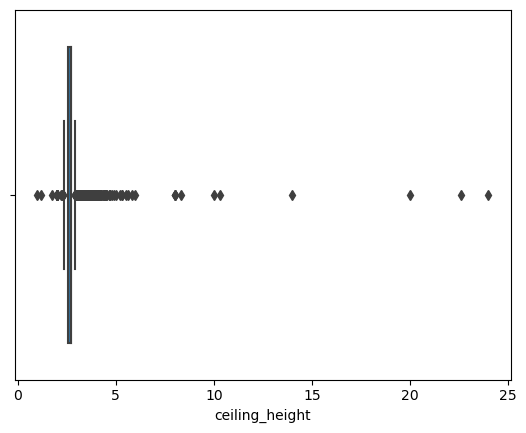

In [35]:
sns.boxplot(x=data['ceiling_height']);

В основном высота потолков 2.5-5.5 метров, эти значения и оставим.

In [36]:
data['ceiling_height'].unique()

array([ 2.7  ,  2.615,  3.03 ,  2.6  ,  2.64 ,  2.5  ,  2.67 ,  2.55 ,
        2.56 ,  3.05 ,  2.75 ,  2.9  ,  2.56 ,  2.8  ,  3.   ,  2.65 ,
        3.2  ,  2.61 ,  3.25 ,  3.45 ,  2.77 ,  2.85 ,  2.525,  2.57 ,
        4.15 ,  3.5  ,  3.3  ,  2.71 ,  4.   ,  2.47 ,  2.73 ,  2.84 ,
        3.1  ,  2.34 ,  3.4  ,  2.52 ,  3.06 ,  2.72 ,  2.54 ,  2.51 ,
        2.78 ,  2.76 ,  2.58 ,  3.7  ,  5.2  ,  2.87 ,  2.66 ,  2.59 ,
        2.   ,  2.45 ,  3.6  ,  3.9  ,  2.92 ,  3.11 ,  3.13 ,  3.8  ,
        3.15 ,  3.55 ,  3.16 ,  3.62 ,  3.12 ,  2.53 ,  2.74 ,  2.96 ,
        2.46 ,  5.3  ,  5.   ,  2.79 ,  2.95 ,  4.06 ,  2.94 ,  3.82 ,
        3.54 ,  3.53 ,  2.83 ,  4.7  ,  2.4  ,  3.38 ,  3.01 ,  5.6  ,
        3.65 ,  3.18 ,  3.35 ,  2.3  ,  3.57 ,  2.48 ,  2.515,  2.62 ,
        2.82 ,  2.65 ,  3.98 ,  2.63 ,  3.83 ,  3.52 ,  3.95 ,  3.75 ,
        2.88 ,  3.67 ,  3.87 ,  3.66 ,  3.85 ,  3.86 ,  4.19 ,  3.24 ,
        4.8  ,  4.5  ,  4.2  ,  3.36 ,  3.08 ,  3.68 ,  3.07 ,  3.37 ,
      

In [37]:
#количество строк всего
len(data['ceiling_height'])

23565

In [38]:
#посмотрим количество строк с потолками меньше 2,5 и больше 5.5
len(data[(data['ceiling_height']<2.5) | (data['ceiling_height']>5.5)])

86

так как таких значений немного, думаю мы можем заменить их медианой

In [39]:
#Заменяем аномальные значения в ceiling_height на медиану
ceiling_height_mean = data['ceiling_height'].mean()
data.loc[((data['ceiling_height']<2.5) | (data['ceiling_height']>5)), 'ceiling_height'] = ceiling_height_mean

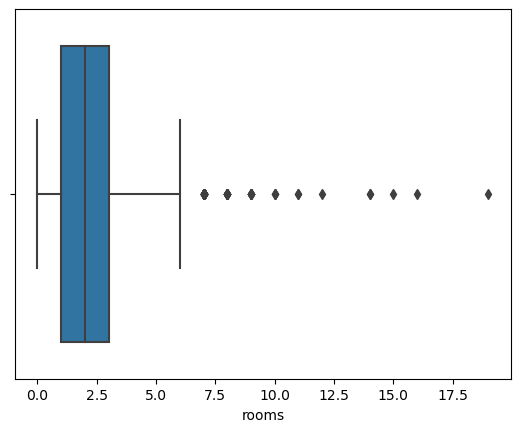

In [40]:
sns.boxplot(x=data['rooms']);

В основном количество комнат от 0 до 6, такие квартиры и оставим.

In [41]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12],
      dtype=int64)

In [42]:
#Посмотрим сколько квартир имеют больше 6 комнат
len(data[data['rooms']>6])

90

In [43]:
#Посмотрим площади таких квартир
data_rooms = data[data['rooms']>6]
data_rooms = data_rooms[['rooms', 'total_area']]
data_rooms

,rooms,total_area
581,7,365.00
648,11,183.70
660,7,483.90
681,7,249.00
750,7,188.80
...,...,...
22264,7,141.00
22420,7,196.00
22649,7,206.00
23400,7,213.00


In [44]:
data['locality_name'].count()

23565

Такие площади и количество комнат может указывать на то, что это таунхаузы или дома с большой площадью, а мы рассматриваем именно квартиры, так что удалим такие строки

In [45]:
data = data[data['rooms']<=6]

In [46]:
#количество строк всего
len(data['ceiling_height'])

23475

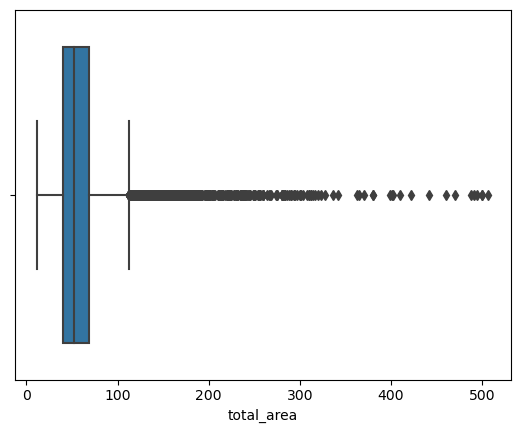

In [47]:
sns.boxplot(x=data['total_area']);

В основном квартиры площадью 30-110 кв. м., но много квартир и площадью до 250.
Посмотрим количество квартир площадью более 250 кв.м

In [48]:
len(data[data['total_area']>250])

73

In [49]:
#удалим такие квартиры, чтоб они не искажали нам средние значения
data = data[data['total_area']<=250]

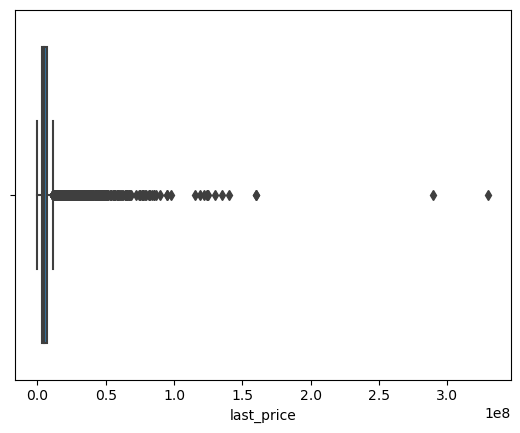

In [50]:
sns.boxplot(x=data['last_price']);

В основном квартиры от 600 000 до 10 000 000. Посмотрим, что за квартиры выбиваются.

In [51]:
#посмотрим квартиры стоимостью меньше 600 000
len(data[data['last_price']<600000])

33

In [52]:
#посмотрим площади таких квартир
last_price = data[data['last_price']<600000]
last_price = last_price[['last_price', 'total_area']]
last_price

,last_price,total_area
1053,550000,29.00
1358,550000,27.60
2097,500000,30.70
4405,500000,52.00
5698,450000,42.00
6859,490000,40.00
7376,550000,35.00
7962,550000,46.20
8105,585000,44.80
8630,560000,32.00


Сильно выбивается квартира площадью 109 метров за 12 тысяч. Удалим это значение

In [53]:
data = data[data['last_price']>100000]

In [54]:
#посмотрим квартиры стоимостью больше 25 миллионов рублей
len(data[data['last_price']>25000000])

356

In [55]:
#посмотрим площади таких квартир
last_price = data[data['last_price']> 25000000]
last_price = last_price[['last_price', 'total_area']]
last_price

,last_price,total_area
3,64900000,159.00
51,45000000,161.00
121,33000000,180.00
147,27700000,179.60
262,37500000,158.00
...,...,...
23299,25900000,167.10
23327,34400000,215.00
23395,40000000,188.00
23446,27000000,110.00


Судя по площади такие квартиры имеют место быть. Но не помешают ли они нашему исследованию? Пока оставим.

In [56]:
#количество квартир расстояние которых от аэропорта менее 3 км
len(data[data['airports_nearest']<3000])

1

Такая квартира одна, возможно, это ошибка, так как квартиры обычно не располагаются так близко 

In [57]:
#заменяем пропуски на -1
data['airports_nearest'] = data['airports_nearest'].fillna(-1)
#фильтруем
data = data[(data['airports_nearest']>3000) | (data['airports_nearest']==-1)]

In [58]:
# количество парков на расстоянии менее 6 метров от парков
len(data[data['parks_nearest']<10])

6

Удалим такие строки, так как квартиры не могут распологаться ближе чем через дорогу от парка

In [59]:
#заменяем пропуски на -1
data['parks_nearest'] = data['parks_nearest'].fillna(-1)
#фильтруем
data = data[(data['parks_nearest']>10) | (data['parks_nearest']==-1)]


### Посчитайте и добавьте в таблицу новые столбцы

Добавьте в таблицу новые столбцы со следующими параметрами:
- [x] цена одного квадратного метра;
- [x] день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- [x] месяц публикации объявления;
- [x] год публикации объявления;
- [x] тип этажа квартиры (значения — «первый», «последний», «другой»);
- [x] расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [60]:
#цена одного квадратного метра это стоимость / общую площадь и присвоим тип int
data['price_1_m'] = (data['last_price'] / data['total_area']).astype(int)

In [61]:
#день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
data['weekday'] = data['first_day_exposition'].dt.weekday

In [62]:
#месяц публикации объявления;
data['month'] = data['first_day_exposition'].dt.month

In [63]:
#год публикации объявления;
data['year'] = data['first_day_exposition'].dt.year

In [64]:
# тип этажа квартиры (значения — «первый», «последний», «другой»);
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_type, axis=1)


In [65]:
# расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)
def distance_center(cityCenters_nearest):
    if cityCenters_nearest >= 0:
        return round(cityCenters_nearest/1000)
    else:
        return -1
data['distance_center'] = data['cityCenters_nearest'].apply(distance_center)

In [66]:
#посмотрим как теперь выглядит наш датасет
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1_m,weekday,month,year,floor_type,distance_center
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,482.00,2,755.00,-1.00,120370,3,3,2019,другой,16
1,7,3350000,40.40,2018-12-04,1,2.62,11,18.60,1,False,...,-1.00,0,NaN,81.00,82920,1,12,2018,первый,19
2,10,5196000,56.00,2015-08-20,2,2.70,5,34.30,4,False,...,90.00,2,574.00,558.00,92785,3,8,2015,другой,14
3,0,64900000,159.00,2015-07-24,3,2.70,14,92.00,9,False,...,84.00,3,234.00,424.00,408176,4,7,2015,другой,7
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,112.00,1,48.00,121.00,100000,1,6,2018,другой,8
5,10,2890000,30.40,2018-09-10,1,2.60,12,14.40,5,False,...,-1.00,0,NaN,55.00,95065,0,9,2018,другой,-1
6,6,3700000,37.30,2017-11-02,1,2.64,26,10.60,6,False,...,-1.00,0,NaN,155.00,99195,3,11,2017,другой,19
7,5,7915000,71.60,2019-04-18,2,2.70,24,52.70,22,False,...,-1.00,0,NaN,-1.00,110544,3,4,2019,другой,12
8,20,2900000,33.16,2018-05-23,1,2.70,27,15.43,26,False,...,-1.00,0,NaN,189.00,87454,2,5,2018,другой,-1
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,-1.00,0,NaN,289.00,88524,6,2,2017,другой,15


In [67]:
#проверяем типы
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23387 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23387 non-null  int64         
 1   last_price            23387 non-null  int32         
 2   total_area            23387 non-null  float64       
 3   first_day_exposition  23387 non-null  datetime64[ns]
 4   rooms                 23387 non-null  int64         
 5   ceiling_height        23387 non-null  float64       
 6   floors_total          23387 non-null  int32         
 7   living_area           23387 non-null  float64       
 8   floor                 23387 non-null  int64         
 9   is_apartment          23387 non-null  bool          
 10  studio                23387 non-null  bool          
 11  open_plan             23387 non-null  bool          
 12  kitchen_area          23387 non-null  float64       
 13  balcony         

### Проведите исследовательский анализ данных

Изучите следующие параметры объектов:
- [x] общая площадь;
- [x] жилая площадь;
- [x] площадь кухни;
- [x] цена объекта;
- [x] количество комнат;
- [x] высота потолков;
- [x] этаж квартиры;
- [x] тип этажа квартиры («первый», «последний», «другой»);
- [x] общее количество этажей в доме;
- [x] расстояние до центра города в метрах;
- [x] расстояние до ближайшего аэропорта;
- [x] расстояние до ближайшего парка;
- [x] день и месяц публикации объявления.
Постройте отдельные гистограммы для каждого из этих параметров. Опишите все ваши наблюдения по параметрам в ячейке с типом markdown.

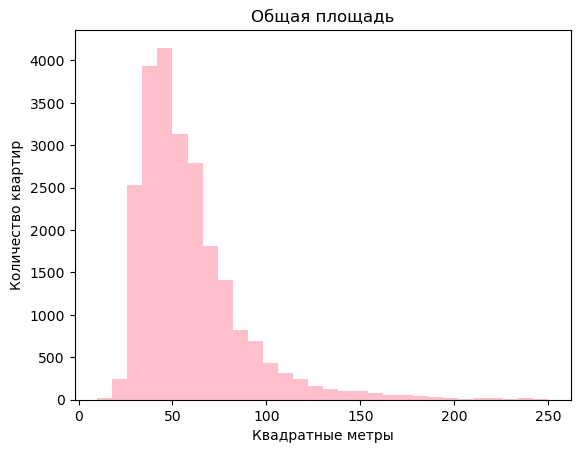

count   23,387.00
mean        58.66
std         28.14
min         12.00
25%         40.00
50%         52.00
75%         69.00
max        250.00
Name: total_area, dtype: float64

In [68]:
import matplotlib.pyplot as plt
#общая площадь
plt.hist(data['total_area'], bins=30, color = "pink", range=(10,250))
plt.title('Общая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
data['total_area'].describe()

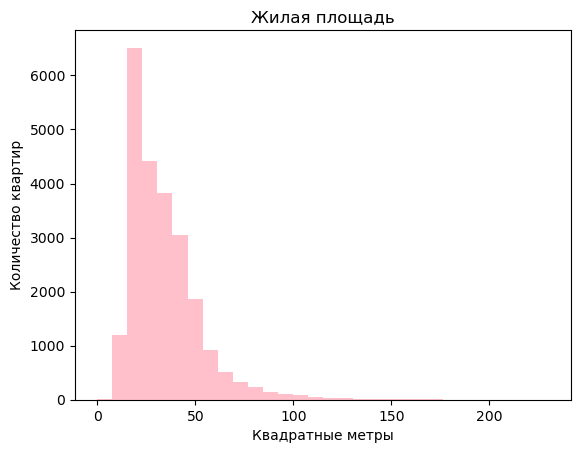

count   23,387.00
mean        33.91
std         18.68
min          2.00
25%         19.00
50%         30.00
75%         42.20
max        228.06
Name: living_area, dtype: float64

In [69]:
#жилая площадь
plt.hist(data['living_area'], bins=30, color = "pink", range=(0,230))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
data['living_area'].describe()

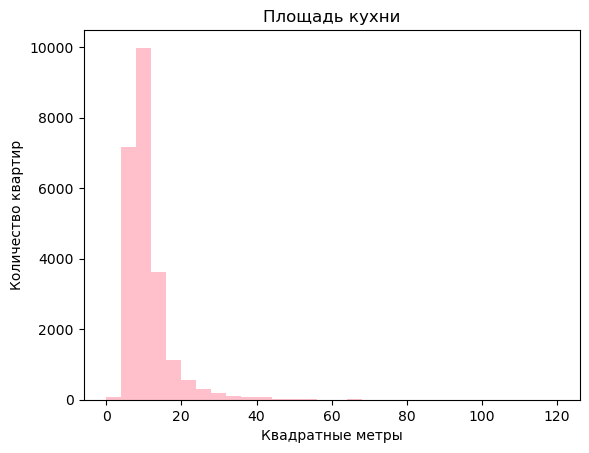

count   23,387.00
mean        10.68
std          6.03
min          0.00
25%          7.00
50%          9.20
75%         12.00
max        117.90
Name: kitchen_area, dtype: float64

In [70]:
# площадь кухни;
plt.hist(data['kitchen_area'], bins=30, color = "pink", range=(0,120))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
data['kitchen_area'].describe()

##### *Площадь*
Большинство квартир площадью 35 - 80 кв.м., квартиры меньше 35 достаточно редкие, квартиры больших размеров встречаются. Есть прям большие площади, часть из них была удалена при поиске аномлаьных значений, но все еще остались квартиры плозадью от 150 до 250 кв.м.
Так же есть квартира со странной жилой площадью 2 метра, а в среднем жилая площадь примерно на 10-20% меньше общей площади квартиры. А площадь кухни соответсвенно примерно 10-15% от площади квартиры.

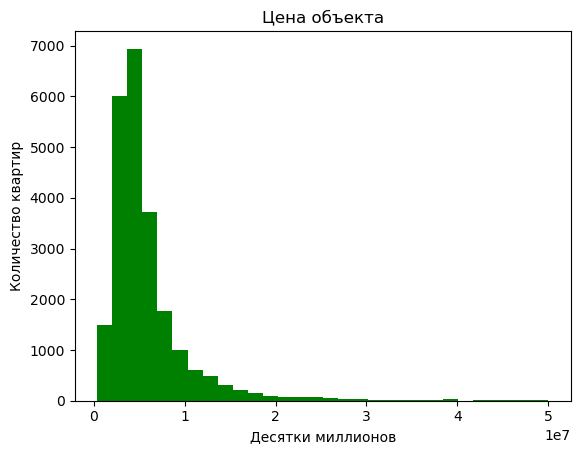

count        23,387.00
mean      6,151,524.68
std       6,958,235.59
min         430,000.00
25%       3,400,000.00
50%       4,600,000.00
75%       6,700,000.00
max     330,000,000.00
Name: last_price, dtype: float64

In [71]:
# цена объекта;
plt.hist(data['last_price'], bins=30, color = "green", range = (400000,50000000))
plt.title('Цена объекта')
plt.xlabel('Десятки миллионов')
plt.ylabel('Количество квартир')
plt.show()
data['last_price'].describe()

##### *Стоимость*
По гистограмме видно, что в основном стоимость квартир - порядка 5-7 миллионов, но и достаточно квартир дороже 10 миллионов.

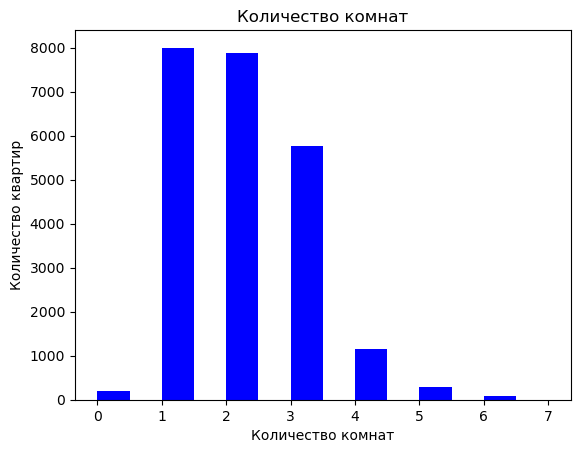

count   23,387.00
mean         2.04
std          0.99
min          0.00
25%          1.00
50%          2.00
75%          3.00
max          6.00
Name: rooms, dtype: float64

In [72]:
# количество комнат;
plt.hist(data['rooms'], bins=14, color = "blue", range = (0,7))
plt.title('Количество комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
data['rooms'].describe()

##### *Комнаты*
В основном продаются 1, 2 и 3-комнатные квартиры, есть небольшая доля 4-комнатных квартир.

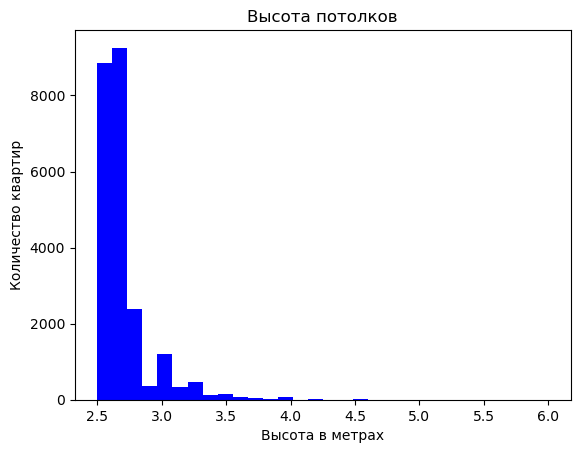

count   23,387.00
mean         2.70
std          0.21
min          2.50
25%          2.55
50%          2.70
75%          2.70
max          5.00
Name: ceiling_height, dtype: float64

In [73]:
# высота потолков;
plt.hist(data['ceiling_height'], bins=30, color = "blue", range = (2.5,6))
plt.title('Высота потолков')
plt.xlabel('Высота в метрах')
plt.ylabel('Количество квартир')
plt.show()
data['ceiling_height'].describe()

##### *Высота потолков*
Основная высота 2.5-2.7

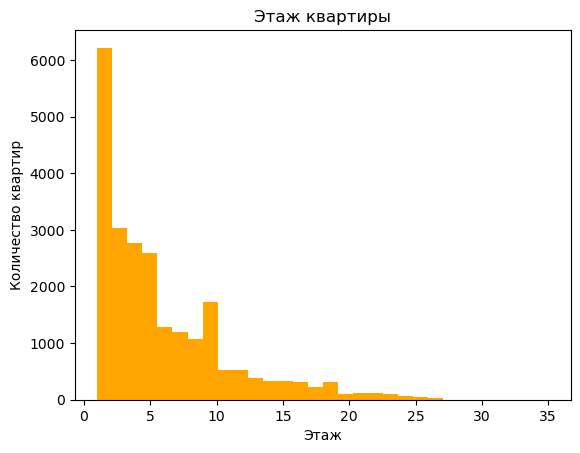

count   23,387.00
mean         5.89
std          4.88
min          1.00
25%          2.00
50%          4.00
75%          8.00
max         33.00
Name: floor, dtype: float64

In [74]:
# этаж квартиры;
plt.hist(data['floor'], bins=30, color = "orange", range = (1,35))
plt.title('Этаж квартиры')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()
data['floor'].describe()

##### *Этажи*
Очень много квартир на первом этаже, возможно, это обусловлено тем, что у нас много объявлений из сельских местностей, где имеются лишь одноэтажные дома, а так очень много пятиэтажных и девятиэтажных домов, также встречаются высотки.

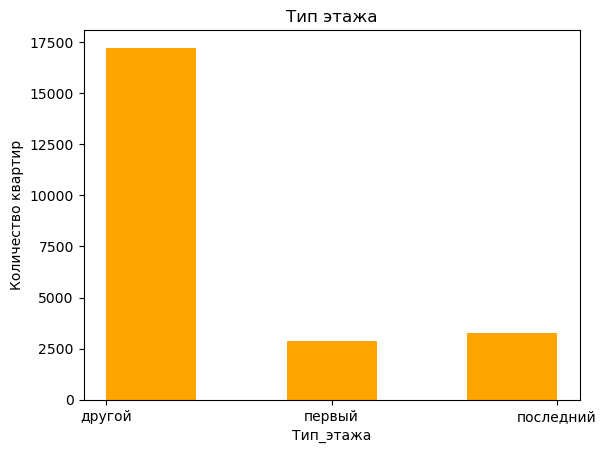

count      23387
unique         3
top       другой
freq       17222
Name: floor_type, dtype: object

In [75]:
# тип этажа квартиры («первый», «последний», «другой»);
plt.hist(data['floor_type'], bins=5, color = "orange", range = (0,2))
plt.title('Тип этажа')
plt.xlabel('Тип_этажа')
plt.ylabel('Количество квартир')
plt.show()
data['floor_type'].describe()

##### *Этажи*
Больше всего квартир на "других" этажах, что очевидно, учитывая сколько там вариантов.


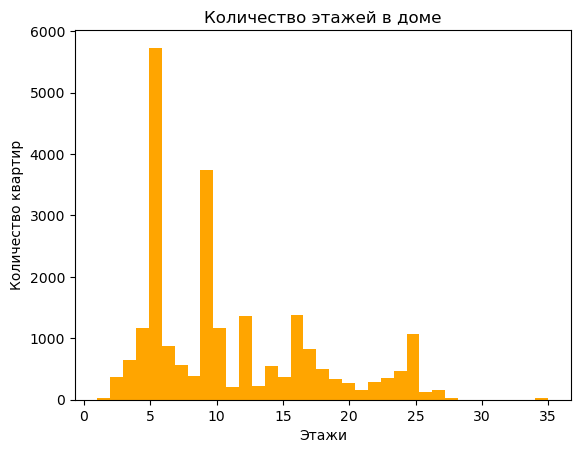

count   23,387.00
mean        10.71
std          6.60
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         60.00
Name: floors_total, dtype: float64

In [76]:
# общее количество этажей в доме;
plt.hist(data['floors_total'], bins=35, color = "orange", range = (1,35))
plt.title('Количество этажей в доме')
plt.xlabel('Этажи')
plt.ylabel('Количество квартир')
plt.show()
data['floors_total'].describe()

##### *Этажи*
Очень много пятиэтажек и девятиэтажек

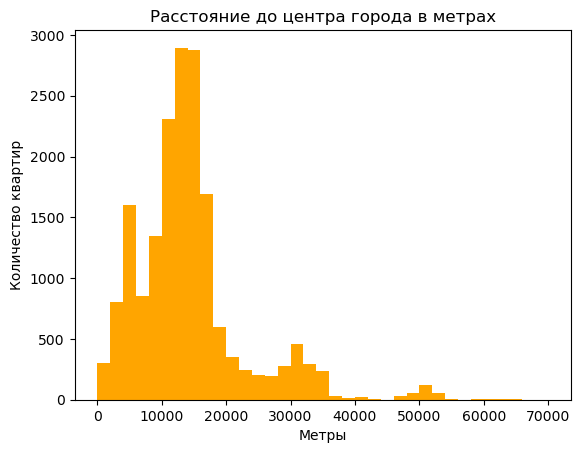

count   17,888.00
mean    14,260.23
std      8,597.03
min        181.00
25%      9,399.00
50%     13,145.50
75%     16,301.50
max     65,968.00
Name: cityCenters_nearest, dtype: float64

In [77]:
# расстояние до центра города в метрах;
plt.hist(data['cityCenters_nearest'], bins=35, color = "orange", range = (0,70000))
plt.title('Расстояние до центра города в метрах')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
data['cityCenters_nearest'].describe()

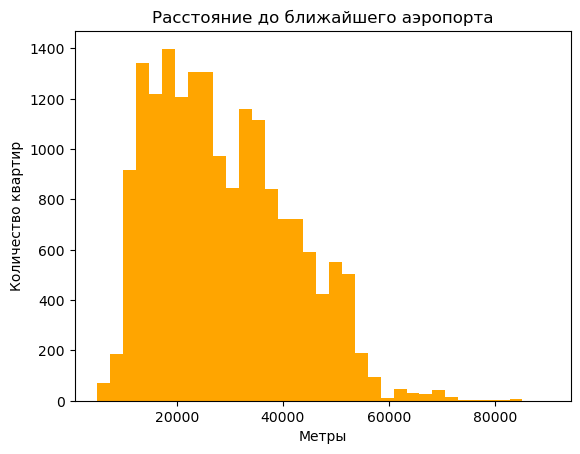

count   23,387.00
mean    22,012.15
std     16,496.56
min         -1.00
25%     10,031.00
50%     21,787.00
75%     34,371.50
max     84,869.00
Name: airports_nearest, dtype: float64

In [78]:
# расстояние до ближайшего аэропорта;
plt.hist(data['airports_nearest'], bins=35, color = "orange", range = (5000,90000))
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
data['airports_nearest'].describe()

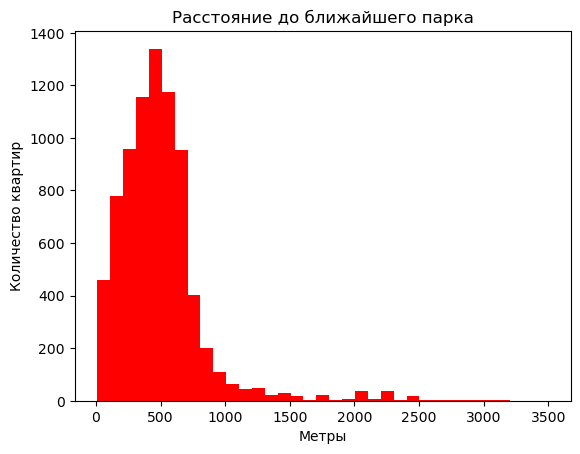

count   23,387.00
mean       165.80
std        306.72
min         -1.00
25%         -1.00
50%         -1.00
75%        296.00
max      3,190.00
Name: parks_nearest, dtype: float64

In [79]:
# расстояние до ближайшего парка;
plt.hist(data['parks_nearest'], bins=35, color = "red", range = (10,3500))
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
data['parks_nearest'].describe()

##### *Расстояния*
В основном квартиры расположены менее чем в 20 км от центра города, в 43 км от аэропорта и менее километра от парков.
Стоимость квадратного метра
Имеет нормальное распределение с пиком в районе 100,000. Варианты дороже 250,000 являются единичными.

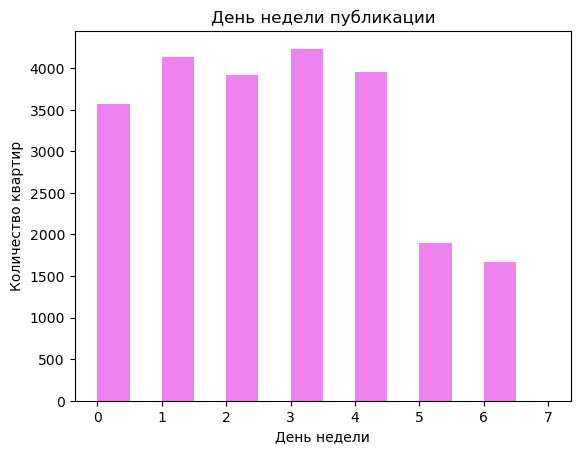

count   23,387.00
mean         2.57
std          1.79
min          0.00
25%          1.00
50%          3.00
75%          4.00
max          6.00
Name: weekday, dtype: float64

In [80]:
# день публикации объявления. 
plt.hist(data['weekday'], bins=14, color = "violet", range = (0,7))
plt.title('День недели публикации')
plt.xlabel('День недели')
plt.ylabel('Количество квартир')
plt.show()
data['weekday'].describe()

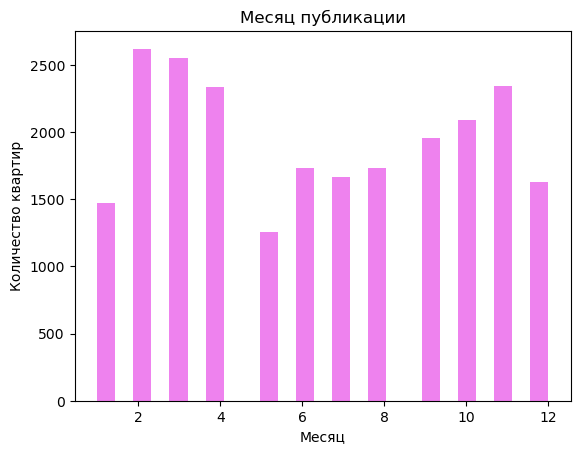

count   23,387.00
mean         6.40
std          3.49
min          1.00
25%          3.00
50%          6.00
75%         10.00
max         12.00
Name: month, dtype: float64

In [81]:
# месяц публикации объявления. 
plt.hist(data['month'], bins=25, color = "violet", range = (1,12))
plt.title('Месяц публикации')
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')
plt.show()
data['month'].describe()

##### *Размещение публикации*
По будням объявления выставляют практически с одинаковой интенсивностью, на выходных намного реже. В основном квартиры продают весной с февраля по апрель или осенью с сентября по ноябрь, летом количество объявлений ниже всего.

___________________________________________________________

*Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. Постройте гистограмму. Посчитайте среднее и медиану. В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?*

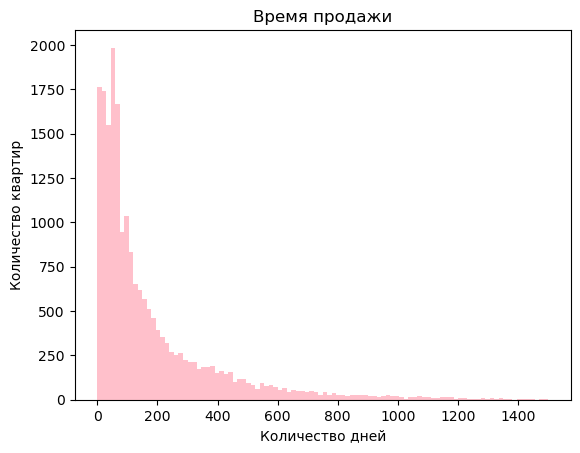

count   20,257.00
mean       180.15
std        219.07
min          1.00
25%         45.00
50%         95.00
75%        230.00
max      1,580.00
Name: days_exposition, dtype: float64

In [82]:
# время продажи
plt.hist(data.query('days_exposition != -1')['days_exposition'], bins=100, color = 'pink', range=(0,1500))
plt.title('Время продажи')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')
plt.show()
data.query('days_exposition != -1')['days_exposition'].describe()

Среднее время продажи - 193 дня, медианное значение - 104 дня. 
Большая часть квартир продается менее чем за 3 месяца (180 дней). Есть очень много квартир проданных в первые дни публикации, но есть и квартиры, которые продавались по несколько лет.
Быстрой продажей можно назвать квартиры, проданные менее чем за 45(1,5 месяца) дней, долгой более чем за 240(8 месяцев) дней.

___________________________________________________________

*Какие факторы больше всего влияют на общую (полную) стоимость объекта?
Изучите, зависит ли цена от:*
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

*Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.*

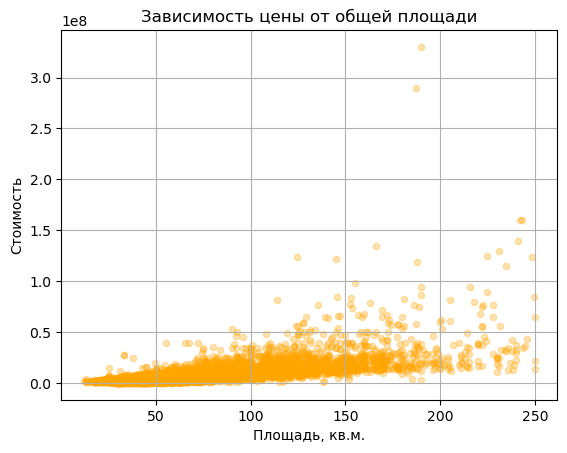

Коэффицент корреляции =  0.6703252939333487


In [83]:
#Зависимость цены от общей площади
data.plot(x='total_area', y='last_price', kind='scatter', grid=True, color='orange', alpha=0.3) 
plt.title('Зависимость цены от общей площади')
plt.xlabel('Площадь, кв.м.')
plt.ylabel('Стоимость')
plt.show()
print('Коэффицент корреляции = ', data['total_area'].corr(data['last_price']))

Корреляция в 0.65 говорит о наличии связи, однако не слишком сильной, как ожидалось. 
Получается, что площадь квартиры не так сильно влияет на стоимость, хотя казалось, что именно это и будет являться основной определяющей величиной.

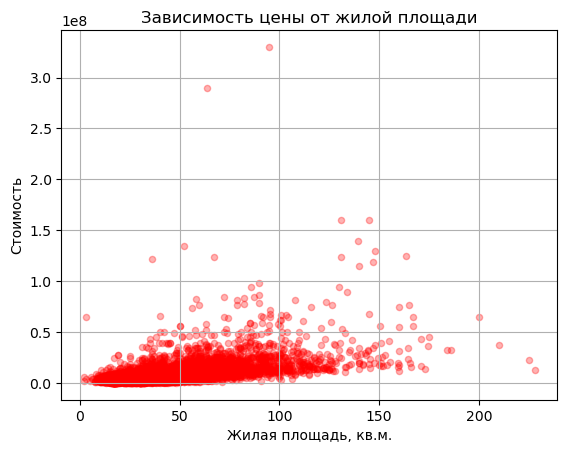

Коэффицент корреляции =  0.5718507407870171


In [84]:
#Зависимость цены от жилой площади
data.plot(x='living_area', y='last_price', kind='scatter', grid=True, color='red', alpha=0.3) 
plt.title('Зависимость цены от жилой площади')
plt.xlabel('Жилая площадь, кв.м.')
plt.ylabel('Стоимость')
plt.show()
print('Коэффицент корреляции = ', data['living_area'].corr(data['last_price']))

Здесь корреляция еще ниже 0.55, но всё же она есть.

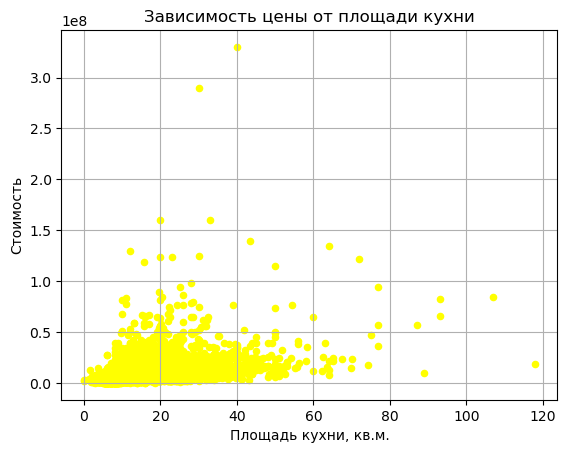

Коэффицент корреляции =  0.4989982546245741


In [85]:
#Зависимость цены от площади кухни
data.plot(x='kitchen_area', y='last_price', kind='scatter', grid=True, color='yellow', alpha=1) 
plt.title('Зависимость цены от площади кухни')
plt.xlabel('Площадь кухни, кв.м.')
plt.ylabel('Стоимость')
plt.show()
print('Коэффицент корреляции = ', data['kitchen_area'].corr(data['last_price']))

Здесь корреляция еще ниже 0.48. Так что влияние площади кухни на стоимость квартиры в целом достаточно не велико.

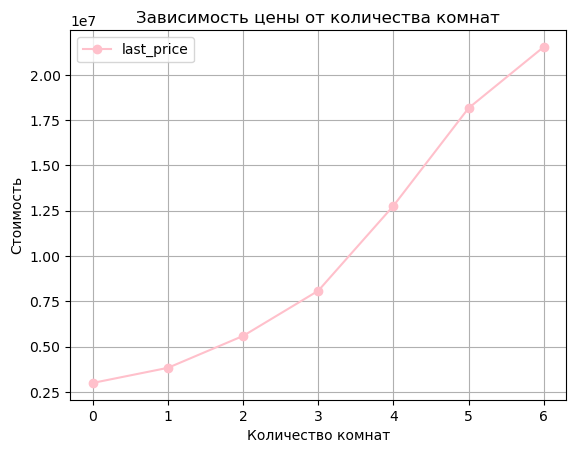

Коэффицент корреляции =  0.3832057320803864


In [86]:
#зависимость цены от количества комнат
data.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', color = 'pink')
plt.title('Зависимость цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость')
plt.show()
print('Коэффицент корреляции = ', data['rooms'].corr(data['last_price']))

Зависимость есть, но она еще меньше, чем зависимость от площади.

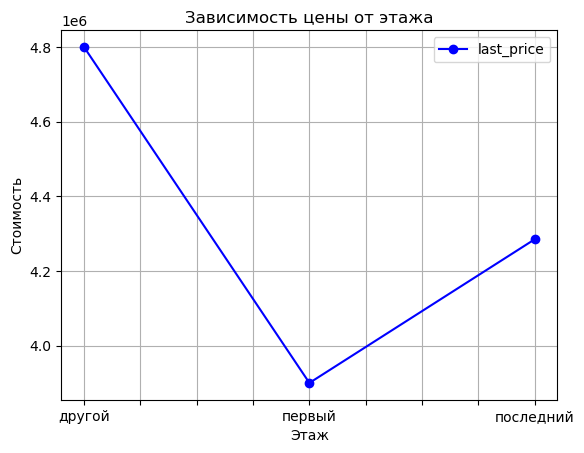

In [87]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(grid=True, style='o-', color = 'blue')
plt.title('Зависимость цены от этажа')
plt.xlabel('Этаж')
plt.ylabel('Стоимость')
plt.show()

Квартиры на первом этаже значительно дешевле, затем идут на последнем, дороже всего брать квартиру на средних этажах.

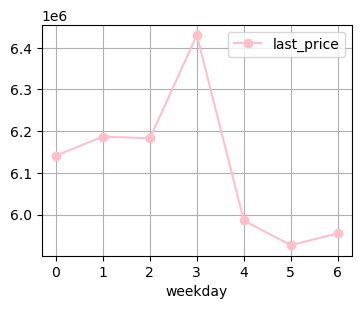

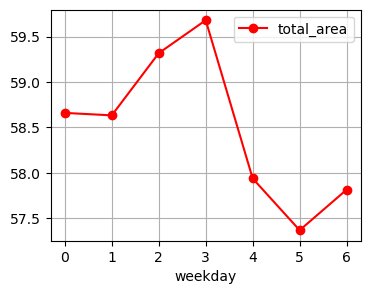

In [88]:
#зависимость цены и площади от даты размещения (день недели).
data.pivot_table(index='weekday', values='last_price').plot(grid=True, style='o-', color = 'pink', figsize=(4,3))
data.pivot_table(index='weekday', values='total_area').plot(grid=True, style='o-', color = 'red', figsize=(4,3))
plt.show()

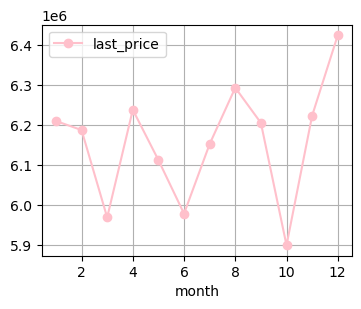

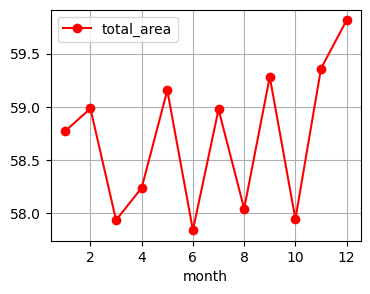

In [89]:
#зависимость цены и площади от даты размещения (день недели).
data.pivot_table(index='month', values='last_price').plot(grid=True, style='o-', color = 'pink', figsize=(4,3))
data.pivot_table(index='month', values='total_area').plot(grid=True, style='o-', color = 'red', figsize=(4,3))
plt.show()

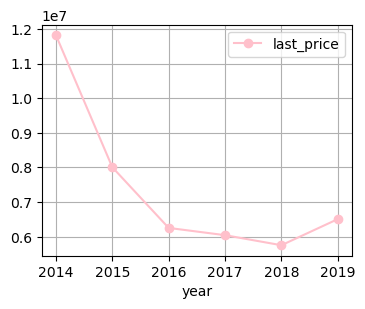

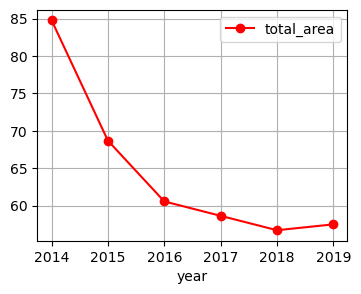

In [90]:
#зависимость цены от даты размещения (год).
data.pivot_table(index='year', values='last_price').plot(grid=True, style='o-', color = 'pink', figsize=(4,3))
data.pivot_table(index='year', values='total_area').plot(grid=True, style='o-', color = 'red', figsize=(4,3))
plt.show()

Квартиры, опубликованные в среду дороже всего, на выходных дешевле, так как квартиры с большой квадратурой продают именно в среду.
Дешевле всего квартиры в марте, июне и октябре, но и площади таких квартир малы.
Квартиры имеют тенденцию дешеветь с 2014-2018, но и площадь квартир уменьшалась.

___________________


*Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.*

In [91]:
#10 городов с наибольшим числом объявлений
city_10 = data['locality_name'].value_counts().head(10)
#строим сводную таблицу со средней ценой за кв.м.
data.query('locality_name in (@city_10.index)').pivot_table(values='price_1_m', index='locality_name').sort_values(by='price_1_m')

,price_1_m
locality_name,
выборг,"58,141.49"
всеволожск,"68,654.01"
гатчина,"68,745.69"
колпино,"75,332.87"
поселок шушары,"78,550.88"
поселок мурино,"85,629.11"
поселок парголово,"90,331.84"
деревня кудрово,"92,473.09"
пушкин,"103,130.41"


Самая высокая стоимость квадратного метра ожидаемо в Санкт-Петербурге - 114048, самая низкая в Выборге - 58141.

_______________________________________________________

*Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.*

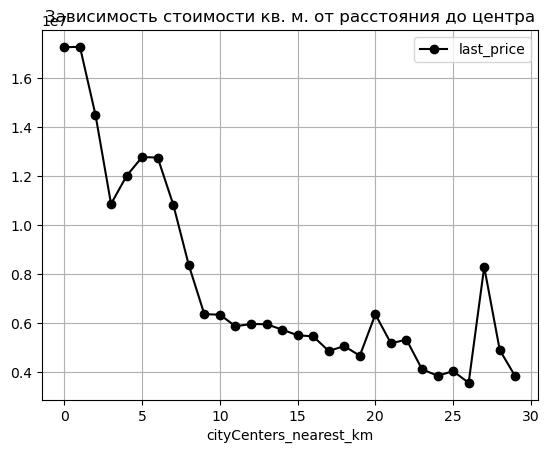

In [92]:
#переводим расстояние до центра в километры
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000
#присваиваем 0 всем значениям Nan, чтоб задать тип int
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(0).astype(int)
#строим таблицу
data.query('locality_name == "санкт-петербург"').pivot_table(index='cityCenters_nearest_km', values='last_price')\
    .plot(grid=True, style='o-', color = 'black', title = 'Зависимость стоимости кв. м. от расстояния до центра')
plt.show()

Чем ближе к центру, тем выше стоимость, но так же дорогие квартиры имеются на расстоянии более 19 км, скорее всего это элитные посёлки в черте города с отдельными роскошными домами.

### Общий вывод

Чаще всего квартиры продают за 95 дней. Если меньше 45 дней, то это быстро, если дольше 230 дней - это долго.
Есть большое число квартир, проданных всего за несколько дней после публикации.
Также есть варианты, которые продавались несколько десятков месяцев.
Факторы, влияющие на стоимость

На стоимость больше влияет площадь квартиры, нежели число комнат. Т.е. могут быть дорогие квартиры с малым числом комнат, но где комнаты просторные.
Первый этаж значительно дешевле остальных вариантов. Также стоимость квартиры на последнем этаже ниже, чем на остальных, кроме первого.
Стоимость квадратного метра в топ-10 населённых пунктов

Дороже всего квадратный метр в Санкт-Петербурге - 114848
Дешевле всего квадратный метр в Выборге - 58141
Факторы, влияющие на стоимость в центре Санкт-Петербурга

В центре города практически нет разницы, насколько квартира удалена от условного центра города.
В центре города последний этаж практически не влияет на стоимость квартиры, в отличие от остального города.
В центре есть очень дорогие однокомнатные квартиры
Экономическая ситуация в стране мало влияет на элитную недвижимость в центре
##### Общие характеристики
Большинство квартир имеют площадь 35 - 70 кв.м.
В основном стоимость квартир - порядка 5-7 миллионов.
В основном продаются 1, 2 и 3-комнатные квартиры, есть небольшая доля 4-комнатных квартир.
Основная высота потолков 2.5-2.7.
Большинство квартир расположено на первом этаже.
В основном квартиры расположены менее чем в 20 км от центра города, в 43 км от аэропорта и менее километра от парков.
Стоимость квадратного метра в среднем 100 000
По будням объявления выставляют практически с одинаковой интенсивностью, на выходных намного реже. В основном квартиры продают весной с февраля по апрель или осенью с сентября по ноябрь, летом количество объявлений ниже всего.
##### Влияние на стоимость квартиры
Больше всего влияние имеет площадь квартиры, затем количество комнат. На первом этаже квартиры дешевле.
##### Срок продажи квартиры
В среднем квартиру продают за 104 дня. Быстрой продажей можно назвать квартиры, проданные менее чем за 45(1,5 месяца) дней, долгой более чем за 240(8 месяцев) дней.
##### Топ-10
Самая высокая стоимость квадратного метра ожидаемо в Санкт-Петербурге - 120914, самая низкая в Ломоносове - 66697.
##### Расположение
Чем ближе к центру, тем выше стоимость.

